In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open('train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open('valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)


In [3]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

38

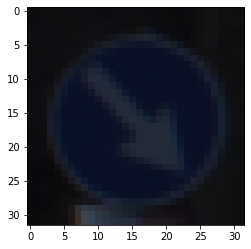

In [4]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

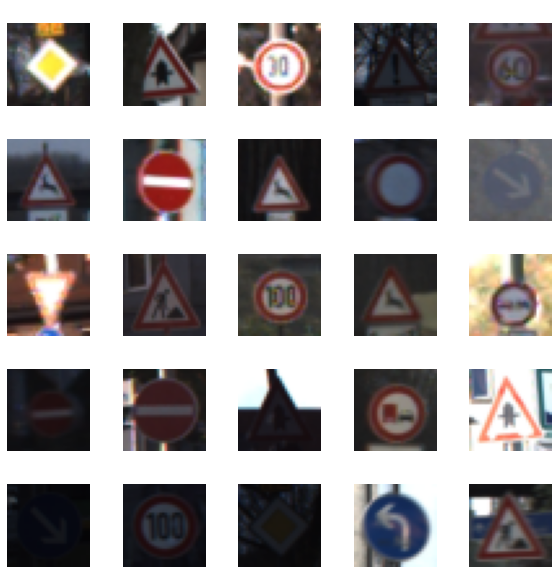

In [5]:
W_grid, L_grid = 5, 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(10, 10))
axes = axes.ravel()
n_training = len(X_train)


for i in np.arange(0, W_grid*L_grid):
    index= np.random.randint(0, n_training)

    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], color='white', fontsize=12)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [7]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)


In [8]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128

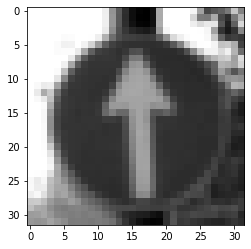

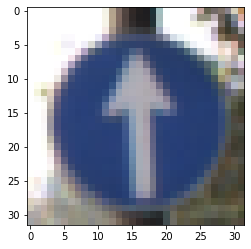

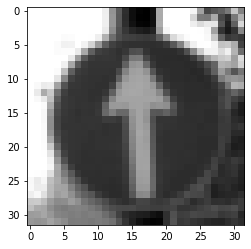

In [9]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

In [10]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))
CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [23]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size=500,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_valid_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 13s 183ms/step - loss: 0.6149 - accuracy: 0.8170 - val_loss: 0.6772 - val_accuracy: 0.7948

In [24]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print(f'Test accuracy: {score[1]}')

395/395 [==============================] - 4s 9ms/step - loss: 0.6972 - accuracy: 0.8952

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

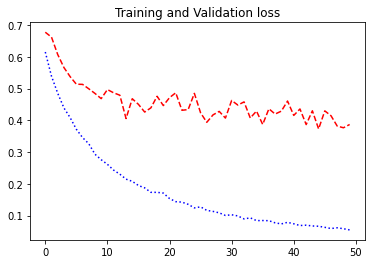

In [27]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, ':b', label='Training loss')
plt.plot(epochs, val_loss, '--r', label='Validation loss')
plt.title('Training and Validation loss')

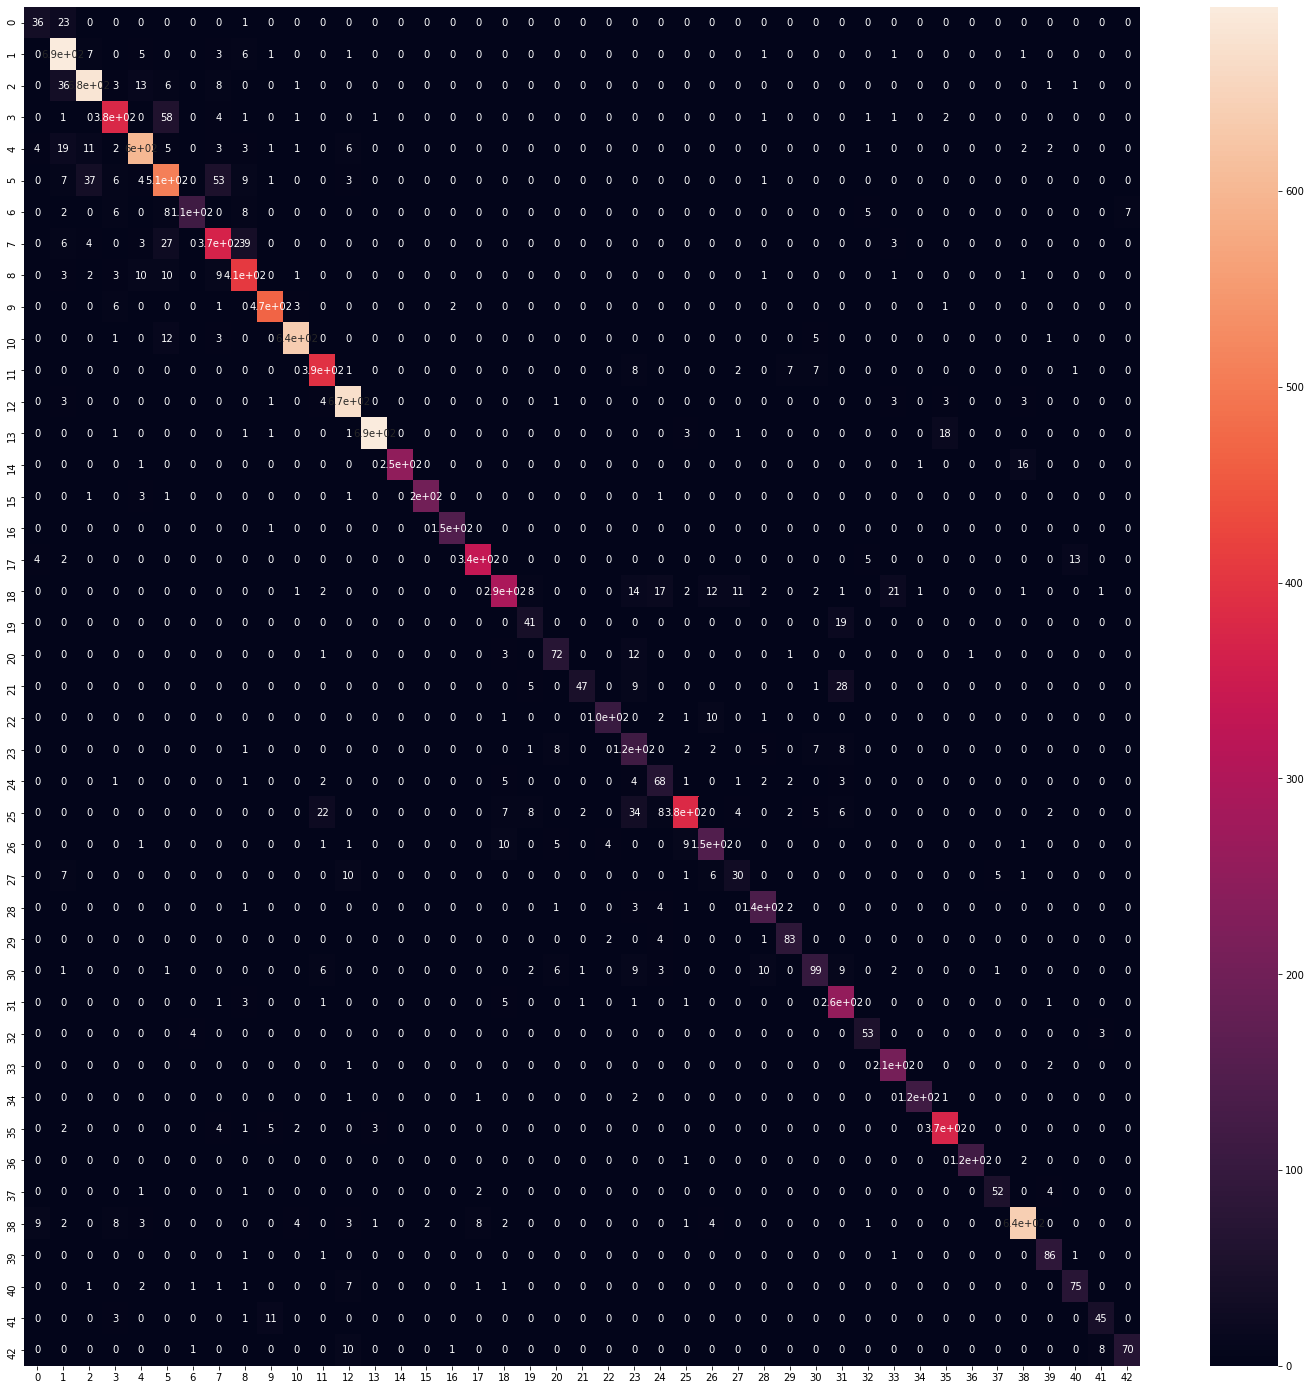

In [28]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)



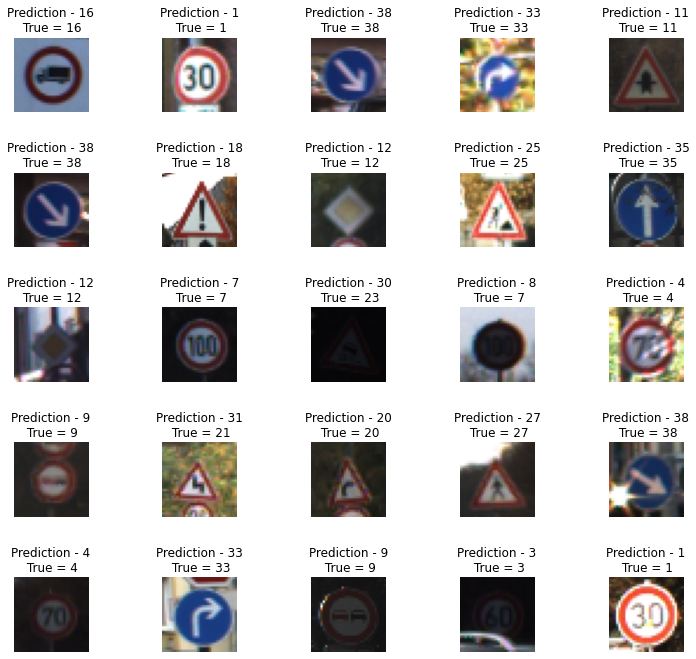

In [29]:
L, W = 5, 5

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction = {predicted_classes[i]}\n True = {y_true[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)